# AI Fall 2022 - A4 - Decision Tree
## Your info

**Student Name:** Mehran Mazaheri

**Student Id:** 98102346

## Practical Question - Decision Tree (25 + 5 points)
In this question you will first write a program to find an appropriate order of features for training a decision tree based on information gain. In the second part, you will use existing implementations to train and tune a classifier using GridSearch on the given dataset. And try to finish this in <15 mins.

### Import
Import the libraries you need in the next cell.

In [1]:
import pandas as pd
from math import log2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#visualize module
import pydotplus
import pandas as pd
from sklearn import tree
from io import StringIO
import pydot

### Part A (20 points)
Consider the following dataframe and answer the following questions:

In [2]:
df = pd.DataFrame({
    'Race': [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'Sex': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
    'Age': [43.0, 72.0, 4.0, 59.0, 34.0, 55.0, 41.0, 39.0, 6.0, 77.0, 67.0, 35.0, 45.0, 39.0, 32.0, 57.0, 99.0, 68.0, 47.0, 28.0],
    'BMI': [25.803, 33.394, 20.278, 32.918, 30.743, 37.734, 23.725, 20.722, 19.452, 22.044, 17.481, 18.918, 28.578, 19.214, 23.562, 23.446, 21.872, 20.691, 25.471, 25.82],
    'Smoker': [1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    'Label': [False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False],
})

df.head()

,Race,Sex,Age,BMI,Smoker,Label
0,1.0,1.0,43.0,25.803,1.0,False
1,2.0,2.0,72.0,33.394,0.0,True
2,1.0,2.0,4.0,20.278,1.0,False
3,1.0,2.0,59.0,32.918,0.0,False
4,1.0,2.0,34.0,30.743,1.0,False


#### QA.1 (10 points)
Complete the following function that calculates and returns the list of features based on their information gain.

In [3]:
def entropy(label: list) -> float:
    seen = []
    H = 0
    numberOfSamples = len(label)
    for value in label:
        if value not in seen:
            seen.append(value)
            numberOfOccurrence = label.count(value)
            if numberOfOccurrence < numberOfSamples:
                H -= numberOfOccurrence/numberOfSamples * log2(numberOfOccurrence/numberOfSamples)
    return H

def conditionalEntropy(feature: list, label: list) -> float:
    seen = []
    numberOfSamples = len(feature)
    H = 0
    for value in feature: 
        if value not in seen:
            seen.append(value)
            indices = [i for i, e in enumerate(feature) if e == value]
            numberOfValue = len(indices)
            newLabel = [label[i] for i in indices]
            H += (numberOfValue/numberOfSamples) * entropy(newLabel)
    return H

In [4]:
def feature_order(X_data:pd.DataFrame, y_data:pd.Series):
    '''
    Calculate the best feature order
    for training a decision tree based on
    information gain.
    Input:
        X_data (pd.DataFrame) contains data features
        y_data (pd.Series) contains the labels
    Output:
        order (list[str]): The `X_data` columns in the correct order
    '''
    informationGain = {}
    for col in X_data.columns:
        informationGain[col] = entropy(list(y_data)) - conditionalEntropy(list(df.get(col)), list(y_data))
    informationGain = dict(sorted(informationGain.items(), key=lambda item: -item[1]))
    print("Information Gains:\n", informationGain)

    order = list(informationGain.keys())
    return order


feature_order(df.get(df.columns[:-1]), df.Label)

Information Gains:
 {'Age': 0.7219280948873623, 'BMI': 0.7219280948873623, 'Race': 0.03690791540384364, 'Smoker': 0.030518829095981692, 'Sex': 0.0018149273570102764}


['Age', 'BMI', 'Race', 'Smoker', 'Sex']

#### QA.2 (5 points)
What are some of the effective approaches to prevent the tree from overfitting? (three approaches)

<font color=#7fad6a>
    <i>
        <ol>
            <li>Pre-Pruning: we could early stop growing of the decision tree by limiting tree's max depth. moreover we can set lower band for samples at each leaf.</li>
            <li>Random Forest: in this approach, multiple decision trees(models) are bootstrapped and combined to form a single decision tree</li>
            <li>Post-Pruning: this technique allows the decision tree model to grow to its full depth, then removes the tree branches to prevent the model from overfitting. one type of post-pruning techniques is Cost Complexity Pruning</li>
        </ol>
    </i>
</font>

#### QA.3 (5 points)
About the `Age` feature which is an integer-valued input attribute, how can a tree utilize it for classification? Write a small piece of code to find the answer for this specific column.

<font color=#7fad6a>
    <i>
        <ol>
        we can divide full range of age parameter into multiple category and map each sample's age to one of the categories. then make decision based on age category instead of exact age.
        </ol>
    </i>
</font>

In [5]:
numberOfParts = 3
age = df.Age
partitionLength = (max(age) - min(age) + 1) / numberOfParts
ageLabel = (age - min(age)) / partitionLength
ageLabel = [int(i) for i in ageLabel]
print("ageLabel: ", ageLabel)

print("New Information Gain : ", entropy(list(df.Label)) - conditionalEntropy(list(ageLabel), list(df.Label)))

ageLabel:  [1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0]
New Information Gain :  0.11902702038018942


### Part B (10 points)
In this part you will learn more about [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and use it to train a classifier and tune its parameters.

#### QB.1 (5 points)
For measuring the _accuracy_ of your models, choose a subset of the given dataset as your validation set (Check out [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [13]:
# Your code here
## Split the dataset
X = np.array(df)[:,:-1]
Y = np.array(df)[:,-1]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, train_size=12)

In [7]:
def performance_score(y_true:np.ndarray, y_pred:np.ndarray, justAccuracy:bool=False) -> list:
    TP = np.sum(y_pred[y_true == True] == True)     #true positive
    TN = np.sum(y_pred[y_true == False] == False)   #true negative
    FP = np.sum(y_pred[y_true == False] == True)    #false positive
    FN = np.sum(y_pred[y_true == True] == False)    #false negative
    N = np.size(y_pred)
    accuracy = (TP + TN) / N
    if justAccuracy:
        return accuracy
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = TP / (TP + 0.5*(FP + FN))
    return accuracy, precision, recall, f1

In [14]:
# Your code here
## Set your own hyperparameters below, such as:
dt_hyperparams = {
    'min_samples_split': 2,
    'criterion': 'entropy'
    # ...
}
clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=2,)
clf.fit(list(XTrain), list(YTrain))
## Train the model and check its performance
y_pred = clf.predict(XTest)
accuracyDT, precisionDT, recallDT, f1DT = performance_score(y_true= YTest, y_pred= y_pred)
print("Decision Tree performance score: \n    accuracy = ", accuracyDT, "\n    presision = ", precisionDT,
    "\n    recall = ", recallDT, "\n    f1 = ", f1DT)

Decision Tree performance score: 
    accuracy =  0.5 
    presision =  0.0 
    recall =  0.0 
    f1 =  0.0


#### QB.2 (5 points)
Take a look at customizable and potentially useful input params of the model, define a range for each of their values, and use GridSearch (Feel free to implement/[import](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) it) and find a set of hyperparametetrs that work best among your candidates.

In [15]:
parameters = {'criterion' : ("entropy", "gini", "log_loss") ,'min_samples_split':[2, 3, 5, 6], 'max_depth':[2,3,4]}
dct = DecisionTreeClassifier()
clf_op = GridSearchCV(dct, parameters)
clf_op.fit(list(XTrain), list(YTrain))
clf_op.best_params_

/home/mehran/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 3}

#### QB.3 (5 extra points)
Visualize the tree splits and interpret it (Hint: Search about `IPython.display.Image`, `pydotplus`, `StringIO`, and `export_graphviz`).

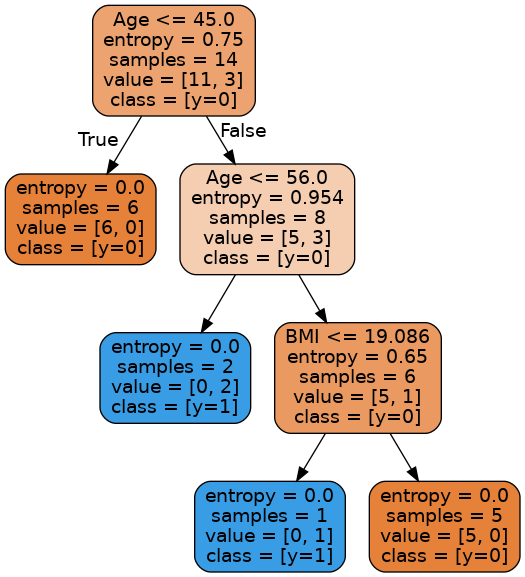

In [10]:
from IPython.display import Image
out_file = tree.export_graphviz(
    clf,
    feature_names   = df.columns[:-1],
    class_names     = ['[y=0]', '[y=1]'],# Ascending numerical order
    filled          = True,
    rounded         = True
)
graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())